<a href="https://colab.research.google.com/github/andiishak67/DQ-Lab-Python/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

df_kunjungan = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/kunjungan_dokter_gigi_kota_x_dqlab.tsv", sep='\t')
print(df_kunjungan.head())

   Bulan  Tahun  tingkat kunjungan ke dokter gigi
0      1   1996                                37
1      2   1996                                32
2      3   1996                                56
3      4   1996                                43
4      5   1996                                52


In [2]:
df_penjualan = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/tingkat_penjualan_kota_x_dqlab.tsv", sep='\t')

print("\n\nUkuran df_penjualan:", df_penjualan.shape)
print(df_penjualan.head())



Ukuran df_penjualan: (24, 6)
   No  Bulan  Tahun  penjualan permen  penjualan sereal  penjualan buah pisang
0   1      1   1996            200661             10324                 112146
1   2      2   1996            297141             13150                 175417
2   3      3   1996            235586              5398                 104645
3   4      4   1996            299498              7609                 112283
4   5      5   1996            395824              5190                 137083


In [3]:
str_bulan = lambda x: "0"+str(x) if x<10 else str(x)

df_kunjungan['Periode'] = df_kunjungan['Tahun'].map(str) + '-' + df_kunjungan['Bulan'].map(str_bulan)
df_penjualan['Periode'] = df_penjualan['Tahun'].map(str) + '-' + df_penjualan['Bulan'].map(str_bulan)

In [4]:
df_kunjungan.drop(['Tahun','Bulan'], inplace=True, axis=1)
df_penjualan.drop(['Tahun','Bulan','No'], inplace=True, axis=1)

In [5]:
df_penjualan.head()

,penjualan permen,penjualan sereal,penjualan buah pisang,Periode
0,200661,10324,112146,1996-01
1,297141,13150,175417,1996-02
2,235586,5398,104645,1996-03
3,299498,7609,112283,1996-04
4,395824,5190,137083,1996-05


# Penggabungan Kedua Dataset

In [6]:
df_kunjungan.set_index("Periode", inplace=True)
df_penjualan.set_index("Periode", inplace=True)

In [8]:
df = df_kunjungan.join(df_penjualan)

In [9]:
df.head()

,tingkat kunjungan ke dokter gigi,penjualan permen,penjualan sereal,penjualan buah pisang
Periode,,,,
1996-01,37,200661,10324,112146
1996-02,32,297141,13150,175417
1996-03,56,235586,5398,104645
1996-04,43,299498,7609,112283
1996-05,52,395824,5190,137083


In [10]:
df.shape

(24, 4)

In [11]:
X_cols = df.columns[1:]
Y_cols = "tingkat kunjungan ke dokter gigi"

### Penjualan Permen

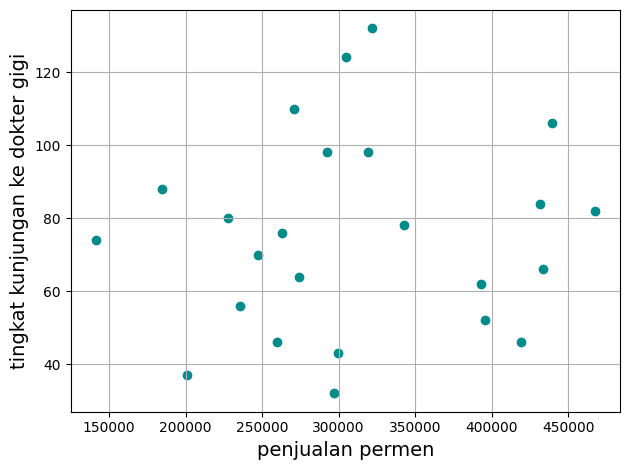

In [12]:
import matplotlib.pyplot as plt

# Buat visualisasi
plt.scatter(df['penjualan permen'], df['tingkat kunjungan ke dokter gigi'], c="darkcyan")
plt.xlabel('penjualan permen', fontsize=14)
plt.ylabel('tingkat kunjungan ke dokter gigi', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()


### Penjualan Sereal

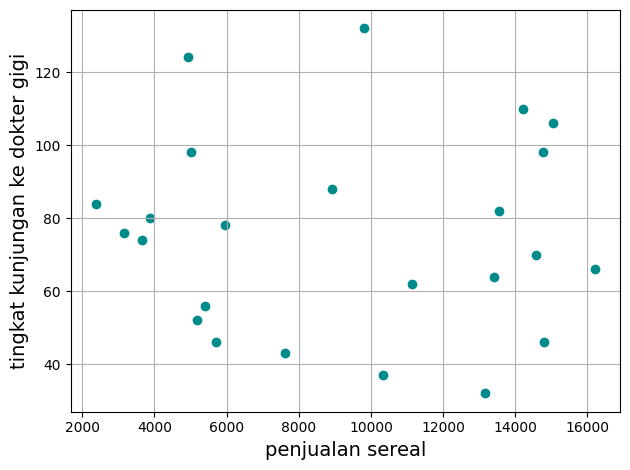

In [13]:
plt.scatter(df['penjualan sereal'], df['tingkat kunjungan ke dokter gigi'], c="darkcyan")
plt.xlabel('penjualan sereal', fontsize=14)
plt.ylabel('tingkat kunjungan ke dokter gigi', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

### Penjualan Pisang

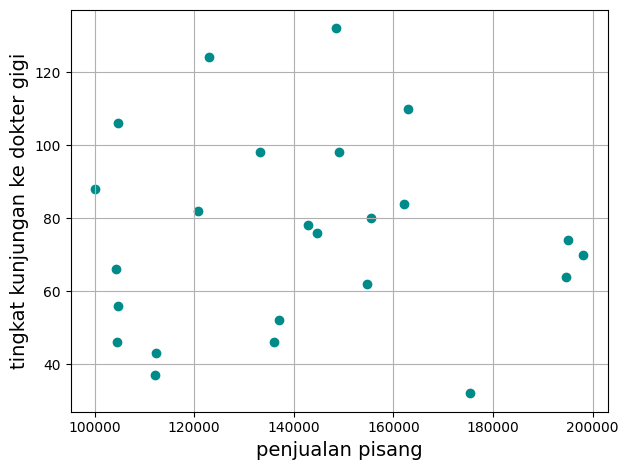

In [14]:
plt.scatter(df['penjualan buah pisang'], df['tingkat kunjungan ke dokter gigi'], c="darkcyan")
plt.xlabel('penjualan pisang', fontsize=14)
plt.ylabel('tingkat kunjungan ke dokter gigi', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

# Koefisien Korelasi Pearson

In [15]:
print("Koefisien korelasi Pearson:")
print("---------------------------")
print(df.corr()["tingkat kunjungan ke dokter gigi"])

Koefisien korelasi Pearson:
---------------------------
tingkat kunjungan ke dokter gigi    1.000000
penjualan permen                    0.083333
penjualan sereal                   -0.027465
penjualan buah pisang               0.028650
Name: tingkat kunjungan ke dokter gigi, dtype: float64


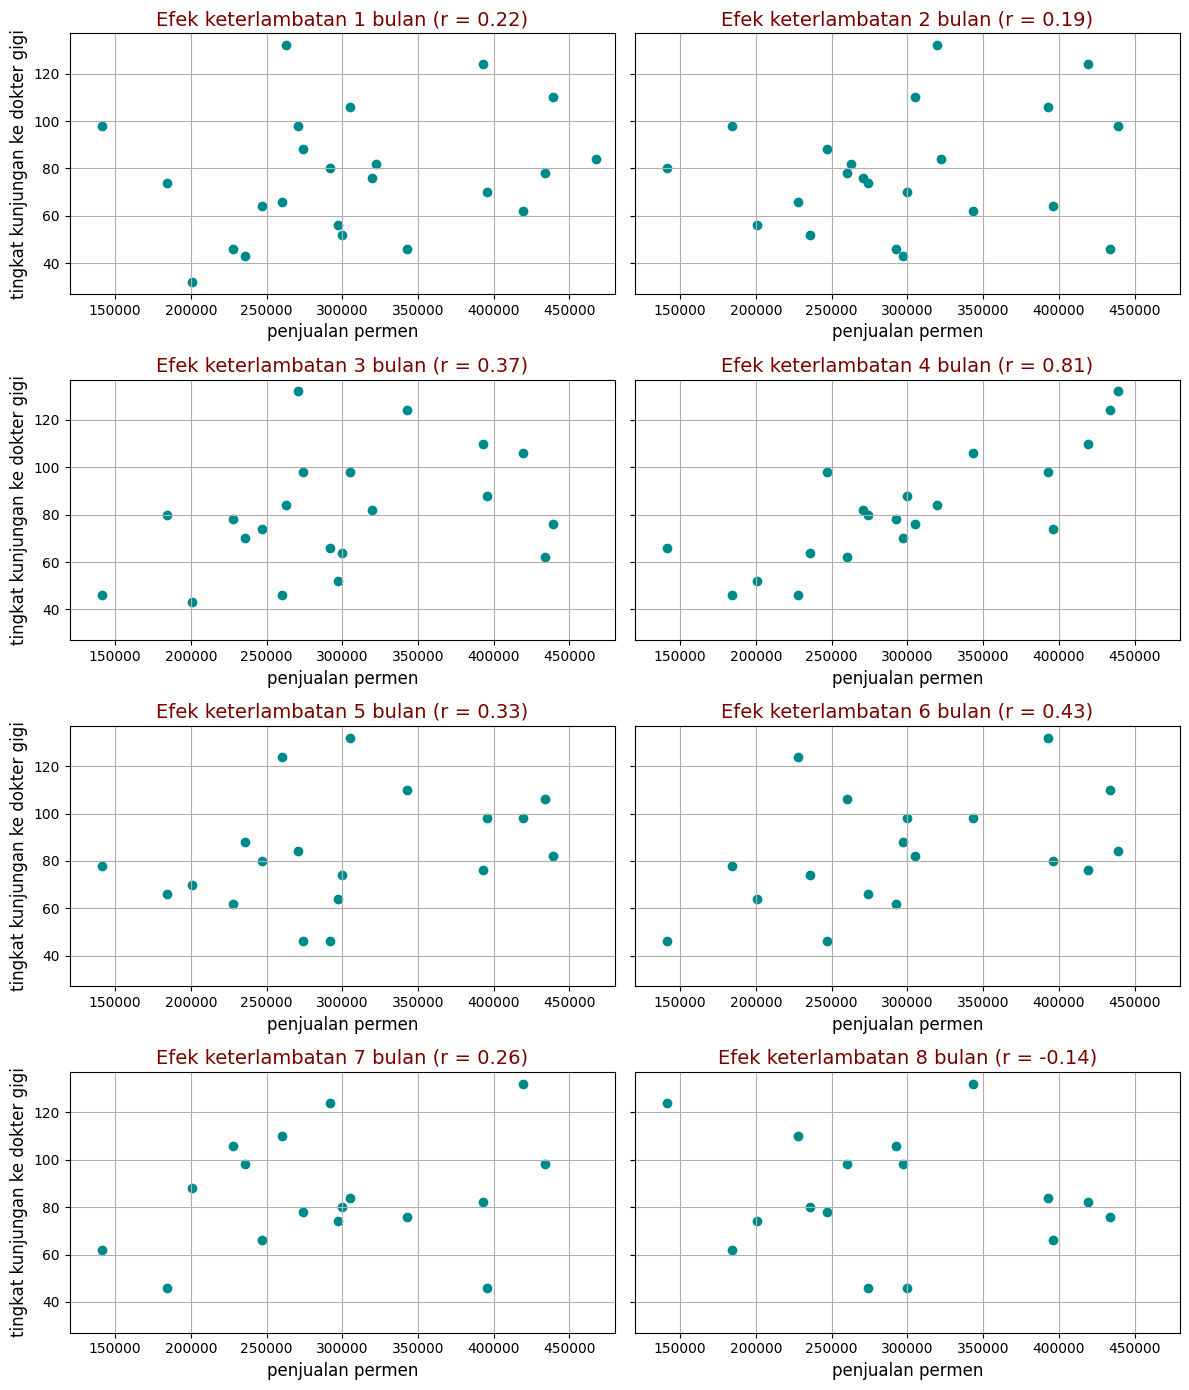

In [16]:
import matplotlib.pyplot as plt
# import stats dari scipy
from scipy import stats

# Spesifikasi keterlambatan hingga 8 bulan
n_delays = 8
# Spesifikasi jumlah kolom untuk subplots
n_plt_cols = 2
fig, axs = plt.subplots(round(n_delays/2), n_plt_cols, figsize=(12, 3.5*round(n_delays/2)), sharey=True)
for i in range(n_delays):
    # Ingat: varibel bebas dan variabel bergantung harus memiliki ukuran yang sama
    # Ambilah variabel bebas: penjualan permen
    x = df["penjualan permen"][:-(i+1)]
    # Ambilah variabel bergantung: tingkat kunjungan ke dokter gigi dan implementasikan keterlambatan
    y = df["tingkat kunjungan ke dokter gigi"][i+1:]
    # Hitung koefisien korelasi Pearson
    pearson_r, p_value = stats.pearsonr(x, y)
    # Buat title setiap subplots dan juga tambatkan nilai
    # koefisien korelasi Pearson yang telah dihitung
    title = "Efek keterlambatan %d bulan (r = %.2f)" % (i+1, pearson_r)

    # Buat scatter plot
    ax = axs[i // n_plt_cols][i % n_plt_cols]
    ax.scatter(x, y, c="darkcyan")
    ax.set_title(title, fontsize=14, color="maroon")
    if i % n_plt_cols == 0:
        ax.set_ylabel("tingkat kunjungan ke dokter gigi", fontsize=12)
    ax.set_xlabel("penjualan permen", fontsize=12)
    ax.set_xlim([120000, 480000])
    ax.grid()

plt.tight_layout()
plt.show()

# Menentukan Persamaan Linier

menentukan koefisien regresi linier, kemiringan (slope):

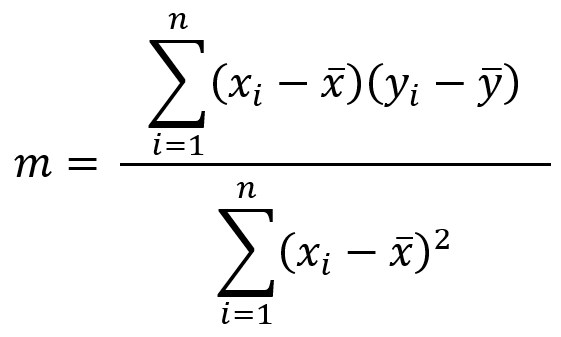

Dan Intercept:

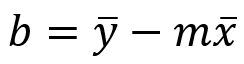

In [17]:
# Import numpy sebagai aliasnya np
import numpy as np
# Ambillah variabel bebas dan bergantung df untuk keterlambatan 4 bulan
# dan ubahlah menjadi numpy 1d narray
x = df["penjualan permen"][:-4].to_numpy()
y = df["tingkat kunjungan ke dokter gigi"][4:].to_numpy()

# Hitunglah nilai rata-rata variabel bebas dan bergantung
x_mean = x.mean()
y_mean = y.mean()

# Hitung nilai pembilang dan penyebut untuk m
m_pembilang = ((x - x_mean) * (y - y_mean)).sum()
m_penyebut = ((x - x_mean)**2).sum()

# Hitung nilai koefisien regresi linier
m = m_pembilang / m_penyebut
b = y_mean - m * x_mean
print("Persamaan regresi linier: y = %.4e * x + %.4f" % (m, b))

Persamaan regresi linier: y = 2.3035e-04 * x + 12.9341


In [18]:
df

,tingkat kunjungan ke dokter gigi,penjualan permen,penjualan sereal,penjualan buah pisang
Periode,,,,
1996-01,37,200661,10324,112146
1996-02,32,297141,13150,175417
1996-03,56,235586,5398,104645
1996-04,43,299498,7609,112283
1996-05,52,395824,5190,137083
1996-06,70,247212,14571,198130
1996-07,64,273899,13407,194685
1996-08,88,184405,8914,100091
1996-09,74,141211,3663,194972


In [19]:
# Ambillah butir data variabel bebas yang belum digunakan
x_new = df["penjualan permen"][-4:].to_numpy()
#  Gunakan x_new ke dalam persamaan regresi
y_pred = m * x_new + b
print("Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:")
for i, kunjungan in enumerate(y_pred):
    print("1998-0%d: %4d kunjungan." % (i+1, round(kunjungan)))

Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:
1998-01:   73 kunjungan.
1998-02:   87 kunjungan.
1998-03:  121 kunjungan.
1998-04:  112 kunjungan.


## LinearRegression dari sklearn.linear_model

In [32]:
from sklearn.linear_model import LinearRegression


X = df["penjualan permen"][:-4].to_numpy().reshape((-1,1))
Y = df["tingkat kunjungan ke dokter gigi"][4:].to_numpy().reshape((-1,1))

lr = LinearRegression()

lr.fit(X,Y)

LinearRegression()

In [34]:
X_new = df["penjualan permen"][-4:].to_numpy().reshape((-1,1))
Y_pred = lr.predict(X_new)

print("Persamaan regresi linier: y = %.4e * x + %.4f\n" % (lr.coef_, lr.intercept_))
print("Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:")
for i, kunjungan in enumerate(Y_pred):
    print("1998-0%d: %4d kunjungan." % (i+1, round(kunjungan[0])))

Persamaan regresi linier: y = 2.3035e-04 * x + 12.9341

Prediksi tingkat kunjungan ke dokter gigi 1998-01 s/d 1998-04:
1998-01:   73 kunjungan.
1998-02:   87 kunjungan.
1998-03:  121 kunjungan.
1998-04:  112 kunjungan.


<ipython-input-34-f9ff9b0d892d>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Persamaan regresi linier: y = %.4e * x + %.4f\n" % (lr.coef_, lr.intercept_))
